In [1]:
# °°° Import datas from Binance °°°

import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
import binance

client = binance.Client()
data = client.get_historical_klines('BTCBUSD', client.KLINE_INTERVAL_1DAY, '14-Jun-2021', '14-Dec-2022')
for i in range(0, len(data)):
    for j in range(0,11):
        data[i][j] = float(data[i][j])
for line in data:
    del line[2:4]
    del line[2:]

pd.options.display.max_rows = 999999
data = pd.DataFrame(data,columns = ['Date','Close'])
data['Date'] = pd.to_datetime(data['Date'], unit = 'ms',utc = True).map(lambda x:x.tz_convert('Europe/Rome'))
data.set_index('Date', inplace = True)

In [2]:
# °°° SIMPLE MOVING AVERAGE function °°°

def SMA(array, period):
    
    return array.rolling(period).mean()

In [3]:
# Define SMAs

data["SMA20"] = SMA(data.Close, 20)
data["SMA50"] = SMA(data.Close, 50)
data["SMA100"] = SMA(data.Close, 100)

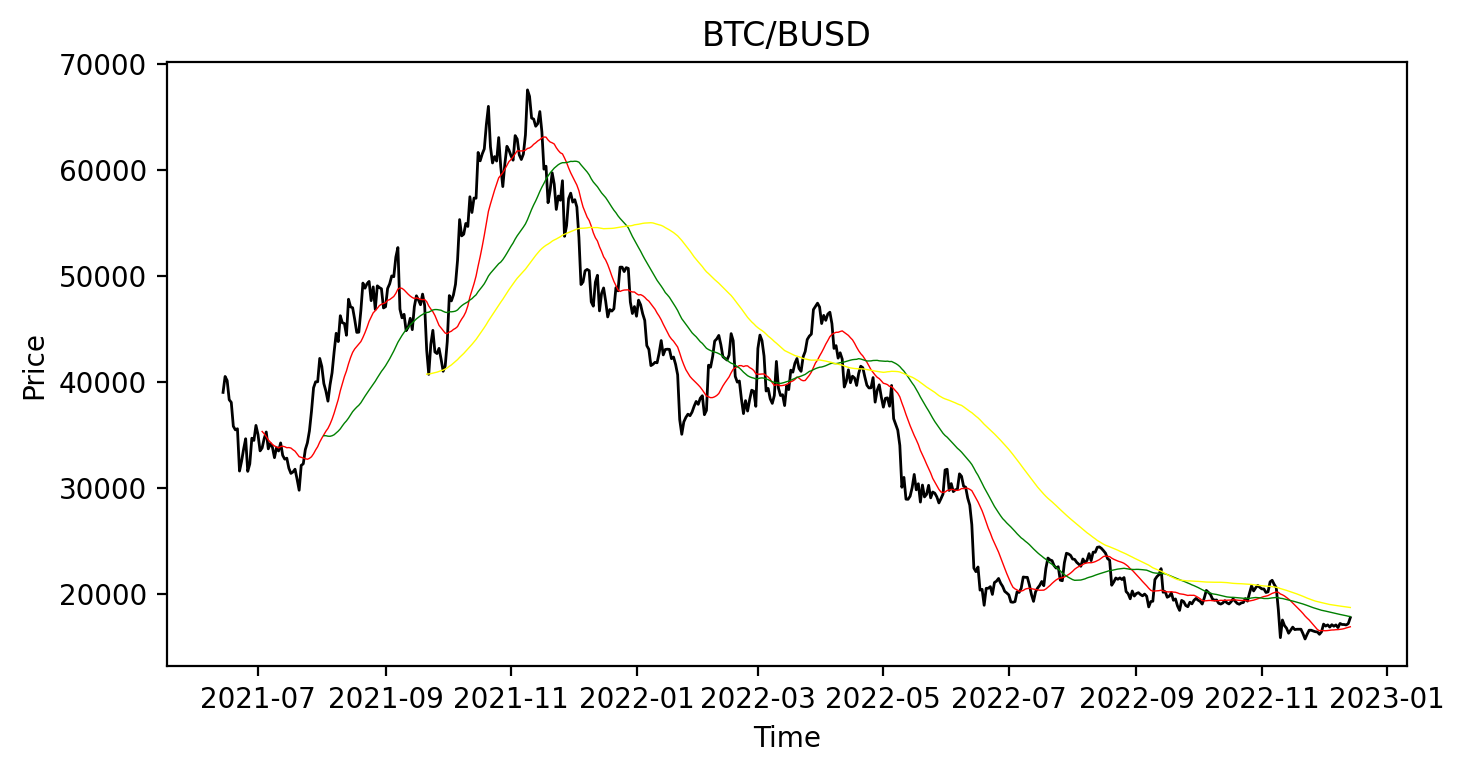

In [4]:
# Grapich visualization

plt.figure(figsize = (8,4), dpi = 200)
plt.plot(data.Close, color = 'black', linewidth = 1.0)
plt.plot(data.SMA20, color = 'red', linewidth = 0.5)
plt.plot(data.SMA50, color = 'green', linewidth = 0.5)
plt.plot(data.SMA100, color = 'yellow', linewidth = 0.5)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BTC/BUSD")
plt.show();